In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline


In [2]:
data = pd.read_excel('form.xlsx')

data.tail(10)

–û—Ç–º–µ—Ç–∫–∞ –≤—Ä–µ–º–µ–Ω–∏      –ü–æ–ª –í–æ–∑—Ä–∞—Å—Ç  \
48 2021-10-13 09:40:14.568  –ú—É–∂—Å–∫–æ–π      17   
49 2021-10-13 09:52:22.698  –ú—É–∂—Å–∫–æ–π      18   
50 2021-10-13 09:54:05.345  –ú—É–∂—Å–∫–æ–π      17   
51 2021-10-13 10:05:56.728  –ñ–µ–Ω—Å–∫–∏–π      17   
52 2021-10-13 10:24:11.897  –ú—É–∂—Å–∫–æ–π      17   
53 2021-10-13 10:50:36.543  –ú—É–∂—Å–∫–æ–π      18   
54 2021-10-13 10:52:43.912  –ú—É–∂—Å–∫–æ–π      18   
55 2021-10-13 12:02:01.442  –ú—É–∂—Å–∫–æ–π      18   
56 2021-10-13 15:09:28.004  –ú—É–∂—Å–∫–æ–π      17   
57 2021-10-13 22:06:03.052  –ú—É–∂—Å–∫–æ–π      17   

   –í—ã–±–µ—Ä–∏—Ç–µ —Ü–≤–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –Ω—Ä–∞–≤–∏—Ç—Å—è –≤–∞–º –±–æ–ª—å—à–µ  \
48                                 –§–∏–æ–ª–µ—Ç–æ–≤—ã–π   
49                                    –ö—Ä–∞—Å–Ω—ã–π   
50                                      –°–∏–Ω–∏–π   
51                                 –§–∏–æ–ª–µ—Ç–æ–≤—ã–π   
52                                      –°–∏–Ω–∏–π   
53                                 –§–∏–æ–ª–µ—Ç–æ–≤—ã–π   
54                                      –°–∏–Ω–∏–π   
55                                     –ß–µ—Ä–Ω—ã–π   
56                                      –ë–µ–ª—ã–π   
57                                     –ß–µ—Ä–Ω—ã–π   

                                           –í–∞—à–µ —Ö–æ–±–±–∏  \
48                                                NaN   
49                                 —Å–Ω–∏–º–∞—Ç—å –Ω–∞ —Ç–µ–ª–µ—Ñ–æ–Ω   
50                         –ò–≥—Ä–∞—Ç—å –Ω–∞ —É–∫—É–ª–µ–ª–µ –∏ —Ñ—É—Ç–±–æ–ª   
51  –ß–∏—Ç–∞—Ç—å –º–∞–Ω–≥–∏/–∫–Ω–∏–≥–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–ª–∞—Å—Å–∏–∫—É, —Ä–∏—Å–æ–≤–∞...   
52                                   –£—á–∏—Ç—å JavaScript   
53  –ú–∞–Ω–≥–∞, –∫–Ω–∏–≥–∏, –Ω–∞—É—á–Ω—ã–µ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏ –ø–ª—é—Å –ø—Ä–æ–≥...   
54                                          –í–µ–ª–æ—Å–∏–ø–µ–¥   
55  –ê–Ω–∏–º–µ,–ú–∞–Ω–≥–∞, –ú–∞–Ω—Ö—É–∞,–ú–∞–Ω—Ö–≤—ã,–∏–≥—Ä—ã —Å –∂–∞–Ω—Ä–æ–º —Å—Ç—Ä–∞—Ç...   
56  –ß–∏—Ç–∞—é –∫–Ω–∏–≥–∏, –ª—é–±–ª—é –ø–æ–¥–∫–∞—Å—Ç—ã, —Ç–æ–ø–ª—é –∑–∞ —Å–∞–º–æ—Ä–∞–∑–≤...   
57                                       –≤–∏–¥–µ–æ—Å—ä—ë–º–∫–∞    

   –ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?  \
48                                    3-5 —á–∞—Å–æ–≤   
49                                    5-7 —á–∞—Å–æ–≤   
50                            –ú–µ–Ω—å—à–µ –ø–∞—Ä—ã —á–∞—Å–æ–≤   
51                            –ú–µ–Ω—å—à–µ –ø–∞—Ä—ã —á–∞—Å–æ–≤   
52                                    3-5 —á–∞—Å–æ–≤   
53                               –ë–æ–ª—å—à–µ 7 —á–∞—Å–æ–≤   
54                                    3-5 —á–∞—Å–æ–≤   
55                                    3-5 —á–∞—Å–æ–≤   
56                               –ë–æ–ª—å—à–µ 7 —á–∞—Å–æ–≤   
57                                    3-5 —á–∞—Å–æ–≤   

   –ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?  \
48                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
49                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
50                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
51                            –í —à—É–º–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏   
52                                –í –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–µ   
53                                –í –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–µ   
54                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
55                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
56                 –í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π   
57                            –í —à—É–º–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏   

   –ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –±—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å–µ—â–∞—Ç—å –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞?  \
48                                       –†–∞–∑ –≤ –Ω–µ–¥–µ–ª—é               
49                                       –†–∞–∑ –≤ –Ω–µ–¥–µ–ª—é               
50                                             –í—Å–µ–≥–¥–∞               
51                                       –†–∞–∑ –≤ –Ω–µ–¥–µ–ª

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ–¥–Ω–æ—Ç–∏–ø–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö 

In [3]:
pd.value_counts(data['–ü–æ–ª']) #–º—É–∂—á–∏–Ω –≤ —Ö–∞–±–µ —á—É—Ç—å –±–æ–ª—å—à–µ 

–ú—É–∂—Å–∫–æ–π       32
–ñ–µ–Ω—Å–∫–∏–π       24
–í–æ–∑–¥–µ—Ä–∂—É—Å—å     2
Name: –ü–æ–ª, dtype: int64

In [4]:
pd.value_counts(data['–í–æ–∑—Ä–∞—Å—Ç']) #–±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–µ—Ä–≤–∞—à–∏ 17-18 –ª–µ—Ç

18     21
17     18
19     10
20+     9
Name: –í–æ–∑—Ä–∞—Å—Ç, dtype: int64

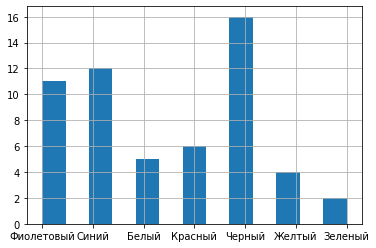

In [21]:
hist_plot = data['–í—ã–±–µ—Ä–∏—Ç–µ —Ü–≤–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –Ω—Ä–∞–≤–∏—Ç—Å—è –≤–∞–º –±–æ–ª—å—à–µ'].hist(bins = 13) #–±–æ–ª—å—à–∏–Ω—Å—Ç–≤—É 
#–Ω—Ä–∞–≤–∏—Ç—Å—è –ª–∏–±–æ —á–µ—Ä–Ω—ã–π, –ª–∏–±–æ —Ö–æ–ª–æ–¥–Ω—ã–µ —Ü–≤–µ—Ç–∞

In [6]:
pd.value_counts(data['–ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?'])

3-5 —á–∞—Å–æ–≤            28
–ë–æ–ª—å—à–µ 7 —á–∞—Å–æ–≤       14
5-7 —á–∞—Å–æ–≤            11
–ú–µ–Ω—å—à–µ –ø–∞—Ä—ã —á–∞—Å–æ–≤     4
Name: –ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?, dtype: int64

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

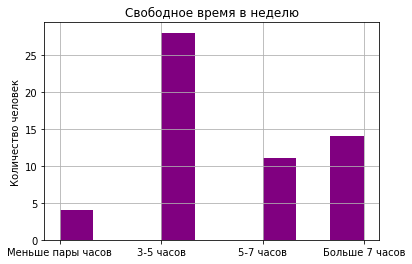

In [22]:
hist_plot = data['–ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?'].hist(bins = 9,color = "purple")
hist_plot.set_title('–°–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è –≤ –Ω–µ–¥–µ–ª—é')
hist_plot.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

In [8]:
pd.value_counts(data['–ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?'])

–í –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –¥—Ä—É–∑–µ–π    41
–í –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–µ                   11
–í —à—É–º–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏                6
Name: –ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?, dtype: int64

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

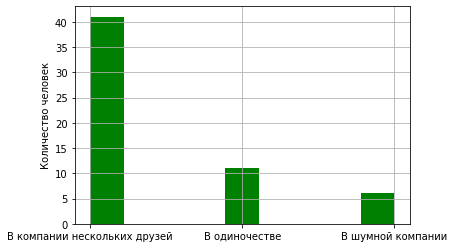

In [24]:
hist_plot = data['–ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?'].hist(bins = 9,color = "green")
hist_plot.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

In [10]:
pd.value_counts(data['–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –±—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å–µ—â–∞—Ç—å –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞?'])

–†–∞–∑ –≤ –Ω–µ–¥–µ–ª—é    35
–í—Å–µ–≥–¥–∞          17
–†–∞–∑ –≤ –º–µ—Å—è—Ü      4
–ù–µ—Ç –≤—Ä–µ–º–µ–Ω–∏      1
Name: –ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –±—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å–µ—â–∞—Ç—å –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞?, dtype: int64

In [11]:
pd.value_counts(data['–ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?'])

–û—Ñ–ª–∞–π–Ω    46
–û–Ω–ª–∞–π–Ω    11
Name: –ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?, dtype: int64

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

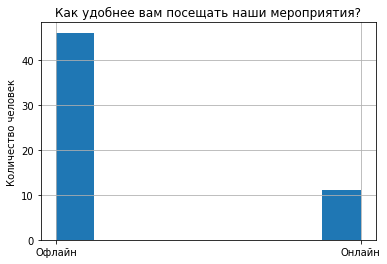

In [25]:
hist_plot = data['–ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?'].hist(bins = 8)
hist_plot.set_title('–ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?')
hist_plot.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

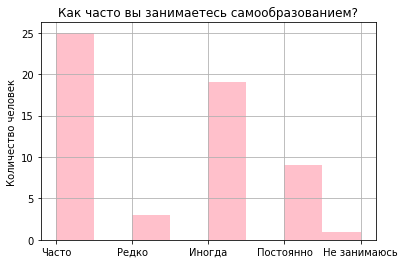

In [26]:
hist_plot = data['–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?'].hist(bins = 8,color = "pink")
hist_plot.set_title('–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?')
hist_plot.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

In [15]:
data.columns 

Index(['–û—Ç–º–µ—Ç–∫–∞ –≤—Ä–µ–º–µ–Ω–∏', '–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç',
       '–í—ã–±–µ—Ä–∏—Ç–µ —Ü–≤–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –Ω—Ä–∞–≤–∏—Ç—Å—è –≤–∞–º –±–æ–ª—å—à–µ', '–í–∞—à–µ —Ö–æ–±–±–∏',
       '–ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?',
       '–ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –±—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å–µ—â–∞—Ç—å –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞?',
       '–ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?',
       '–ö–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –∏–≤–µ–Ω—Ç—ã –≤—ã –±—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–µ—Ç–∏–ª–∏? ',
       '–ö–∞–∫–∏–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–æ–º —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑—É–µ—Ç–µ—Å—å?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã —á–∏—Ç–∞–µ—Ç–µ –Ω–æ–≤–æ—Å—Ç–∏?', '–ö–∞–∫–æ–π —Ä–æ–¥ –Ω–æ–≤–æ—Å—Ç–µ–π –≤–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–µ–Ω?',
       '–°—á–∏—Ç

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

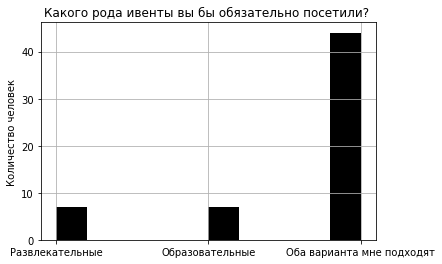

In [17]:
hist_plot = data['–ö–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –∏–≤–µ–Ω—Ç—ã –≤—ã –±—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–µ—Ç–∏–ª–∏? '].hist(bins = 10,color = "black")
hist_plot.set_title('–ö–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –∏–≤–µ–Ω—Ç—ã –≤—ã –±—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–µ—Ç–∏–ª–∏? ')
hist_plot.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫')

In [35]:
pd.value_counts(data['–ö–∞–∫–∏–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–æ–º —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑—É–µ—Ç–µ—Å—å?'])

–ê–≤—Ç–æ–±—É—Å/—Ç—Ä–æ–ª–ª–µ–π–±—É—Å                                       27
–ü–µ—à–∫–æ–º                                                   16
–ú–µ—Ç—Ä–æ                                                    10
–ê–≤—Ç–æ–±—É—Å –∏ –ø–µ—à–∫–æ–º                                          1
–ê–≤—Ç–æ–±—É—Å/—Ç–∞–∫—Å–∏+–º–µ—Ç—Ä–æ                                       1
–ú–µ—Ç—Ä–æ, –Ω–æ–≥–∏                                               1
–ò–Ω–æ–≥–¥–∞ –º–µ—Ç—Ä–æ, –∏–Ω–æ–≥–¥–∞ –∞–≤—Ç–æ–±—É—Å                              1
–ø–µ—à–∫–æ–æ–º –∏–ª–∏ —Å–∞–º–æ–∫–∞—Ç–µ –∏–ª–∏ –Ω–∞ –∞–≤—Ç–æ–±—É—Å–µ –∏ —Ä–µ–¥–∫–æ –Ω–∞ –º–µ—Ç—Ä–æ     1
Name: –ö–∞–∫–∏–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–æ–º —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑—É–µ—Ç–µ—Å—å?, dtype: int64

In [39]:
pd.value_counts(data['–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?'])

–ß–∞—Å—Ç–æ           25
–ò–Ω–æ–≥–¥–∞          19
–ü–æ—Å—Ç–æ—è–Ω–Ω–æ        9
–†–µ–¥–∫–æ            3
–ù–µ –∑–∞–Ω–∏–º–∞—é—Å—å     1
Name: –ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?, dtype: int64

In [41]:
pd.value_counts(data['–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã —á–∏—Ç–∞–µ—Ç–µ –Ω–æ–≤–æ—Å—Ç–∏?'])

–ö–∞–∂–¥—ã–π –¥–µ–Ω—å                 23
–†–∞–∑ –≤ –Ω–µ–¥–µ–ª—é                17
–ù–µ —á–∏—Ç–∞—é                    10
–†–∞–∑ –≤ –º–µ—Å—è—Ü                  6
–†–∞–∑ –≤ –¥–≤–∞ –∏–ª–∏ –≤ —Ç—Ä–∏ –¥–Ω—è      1
–ù–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é       1
Name: –ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã —á–∏—Ç–∞–µ—Ç–µ –Ω–æ–≤–æ—Å—Ç–∏?, dtype: int64

In [43]:
 pd.value_counts(data['–ö–∞–∫–æ–π —Ä–æ–¥ –Ω–æ–≤–æ—Å—Ç–µ–π –≤–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–µ–Ω?']) #–ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Å–æ—Ü–∏–∞–ª—å–Ω—ã–µ –∏ —Ä–µ–∂–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–µ

–°–æ—Ü–∏–∞–ª—å–Ω—ã–µ                                                                                       32
–ü—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π                                                                                  8
–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ                                                                                      3
–í—Å–µ –∏ —Å—Ä–∞–∑—É. –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö —Å–æ–±—ã—Ç–∏–π –º–Ω–æ–≥–æ –Ω–µ –±—ã–≤–∞–µ—Ç                                                   1
–≤—Å–µ –ø–æ –Ω–µ–º–Ω–æ–≥—É                                                                                    1
–§–∞–Ω–¥–æ–º–Ω—ã–µ                                                                                         1
–ù–µ —á–∏—Ç–∞—é                                                                                          1
—Ñ–∞—Å—Ç —Ñ—É–¥ –Ω–æ–≤–æ—Å—Ç–∏                                                                                  1
–ò–∑ –∏–Ω–¥—É—Å—Ç—Ä–∏–∏ –∏–≥—Ä –∏ –ø–æ IT —Å—Ñ–µ—Ä–µ, —Ç–∞–∫ –∂–µ –∏–Ω–æ–≥–¥–∞ —Å

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≥–µ–Ω–¥–µ—Ä—É - –∫–∞–∫–∏–º —Å–æ—Ü–∏–∞–ª—å–Ω—ã–º —Å–µ—Ç—è–º –æ—Ç–¥–∞—é—Ç –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –º –∏ –∂, –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã, –∏ –¥—Ä—É–≥–∏–µ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏

In [46]:
female_data = data.loc[data['–ü–æ–ª'] == '–ñ–µ–Ω—Å–∫–∏–π', :]
male_data = data.loc[data['–ü–æ–ª'] == '–ú—É–∂—Å–∫–æ–π', :] 
                                               

In [50]:
pd.value_counts(female_data['–°—á–∏—Ç–∞–µ—Ç–µ –ª–∏ –≤—ã —Å–µ–±—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–º —á–µ–ª–æ–≤–µ–∫–æ–º ?']) 

–î–∞     17
–ù–µ—Ç     6
Name: –°—á–∏—Ç–∞–µ—Ç–µ –ª–∏ –≤—ã —Å–µ–±—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–º —á–µ–ª–æ–≤–µ–∫–æ–º ?, dtype: int64

In [51]:
17/23 * 100 - #73 –ø—Ä–æ—Ü–µ–Ω—Ç–∞ –¥–µ–≤—É—à–µ —Å—á–∏—Ç–∞–µ—Ç —Å–µ–±—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–º–∏

73.91304347826086

In [52]:
pd.value_counts(male_data['–°—á–∏—Ç–∞–µ—Ç–µ –ª–∏ –≤—ã —Å–µ–±—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–º —á–µ–ª–æ–≤–µ–∫–æ–º ?']) 

–î–∞     21
–ù–µ—Ç    11
Name: –°—á–∏—Ç–∞–µ—Ç–µ –ª–∏ –≤—ã —Å–µ–±—è –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–º —á–µ–ª–æ–≤–µ–∫–æ–º ?, dtype: int64

In [53]:
21/32*100 #–º—É–∂—á–∏–Ω—ã –±–æ–ª–µ–µ —Å–∞–º–æ–∫—Ä–∏—Ç–∏—á–Ω—ã

65.625

Text(0, 0.5, '–ß–∞—Å—Ç–æ—Ç–∞')

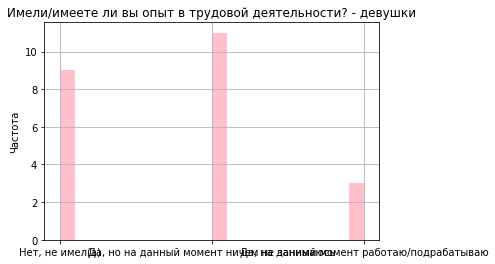

In [59]:
#–æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã —Å—Ä–µ–¥–∏ –¥–µ–≤—É—à–µ–∫
hist_plot = female_data['–ò–º–µ–ª–∏/–∏–º–µ–µ—Ç–µ –ª–∏ –≤—ã –æ–ø—ã—Ç –≤ —Ç—Ä—É–¥–æ–≤–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏?'].hist(bins = 20,color = "pink")
hist_plot.set_title('–ò–º–µ–ª–∏/–∏–º–µ–µ—Ç–µ –ª–∏ –≤—ã –æ–ø—ã—Ç –≤ —Ç—Ä—É–¥–æ–≤–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏? - –¥–µ–≤—É—à–∫–∏')
hist_plot.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

Text(0, 0.5, '–ß–∞—Å—Ç–æ—Ç–∞')

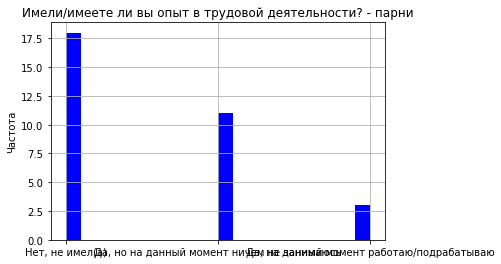

In [62]:
#–û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã —Å—Ä–µ–¥–∏ —Å—Ä–µ–¥–∏ –ø–∞—Ä–Ω–µ–π

hist_plot = male_data['–ò–º–µ–ª–∏/–∏–º–µ–µ—Ç–µ –ª–∏ –≤—ã –æ–ø—ã—Ç –≤ —Ç—Ä—É–¥–æ–≤–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏?'].hist(bins = 20,color = "blue")
hist_plot.set_title('–ò–º–µ–ª–∏/–∏–º–µ–µ—Ç–µ –ª–∏ –≤—ã –æ–ø—ã—Ç –≤ —Ç—Ä—É–¥–æ–≤–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏? - –ø–∞—Ä–Ω–∏')
hist_plot.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

In [64]:
data.columns

Index(['–û—Ç–º–µ—Ç–∫–∞ –≤—Ä–µ–º–µ–Ω–∏', '–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç',
       '–í—ã–±–µ—Ä–∏—Ç–µ —Ü–≤–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –Ω—Ä–∞–≤–∏—Ç—Å—è –≤–∞–º –±–æ–ª—å—à–µ', '–í–∞—à–µ —Ö–æ–±–±–∏',
       '–ö–∞–∫ –º–Ω–æ–≥–æ —É –≤–∞—Å —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ –Ω–µ–¥–µ–ª—é?',
       '–ö–∞–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–µ—Ç–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –±—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å–µ—â–∞—Ç—å –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞?',
       '–ö–∞–∫ —É–¥–æ–±–Ω–µ–µ –≤–∞–º –ø–æ—Å–µ—â–∞—Ç—å –Ω–∞—à–∏ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è?',
       '–ö–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –∏–≤–µ–Ω—Ç—ã –≤—ã –±—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–µ—Ç–∏–ª–∏? ',
       '–ö–∞–∫–∏–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–æ–º —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑—É–µ—Ç–µ—Å—å?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã –∑–∞–Ω–∏–º–∞–µ—Ç–µ—Å—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º?',
       '–ö–∞–∫ —á–∞—Å—Ç–æ –≤—ã —á–∏—Ç–∞–µ—Ç–µ –Ω–æ–≤–æ—Å—Ç–∏?', '–ö–∞–∫–æ–π —Ä–æ–¥ –Ω–æ–≤–æ—Å—Ç–µ–π –≤–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–µ–Ω?',
       '–°—á–∏—Ç

In [66]:
#—Å–æ—Ü–∏–∞–ª—å–Ω—ã–µ —Å–µ—Ç–∏ - –¥–µ–≤—É—à–∫–∏ —á—Ç–æ –±–æ–ª—å—à–µ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç 


In [65]:
pd.value_counts(female_data['–ù–∞ –∫–∞–∫–æ–π —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –ø–ª–æ—â–∞–¥–∫–µ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Å–≤–æ–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏?'])

Instagram              10
YouTube                 5
TikTok                  5
Instagram, telegram     1
Telegram                1
–ò–Ω—Å—Ç–∞ –∏ —Ç–∏–∫—Ç–æ–∫          1
Name: –ù–∞ –∫–∞–∫–æ–π —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –ø–ª–æ—â–∞–¥–∫–µ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Å–≤–æ–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏?, dtype: int64

In [67]:
# boys
pd.value_counts(male_data['–ù–∞ –∫–∞–∫–æ–π —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –ø–ª–æ—â–∞–¥–∫–µ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Å–≤–æ–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏?'])

YouTube                                                       11
Instagram                                                     10
TikTok                                                         3
–í–ö, telegram, youtube, insta, twitter                          1
–í–ö–æ–Ω—Ç–∞–∫—Ç–µ                                                      1
–í–ö, Telegram, YouTube                                          1
–¢–µ–ª–µ–≥–µ –æ—á–µ–Ω—å —Ä–µ–¥–∫–æ, –∞ —Ç–∞–∫ –Ω–µ –ø–æ–ª—å–∑—É—é—Å—å —Å–æ—Ü–∏–∞–ª—å–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏     1
Insta & YouTube & Telegram                                     1
Mangalib.ru                                                    1
–≤—Å–µ 3                                                          1
Telegram                                                       1
Name: –ù–∞ –∫–∞–∫–æ–π —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –ø–ª–æ—â–∞–¥–∫–µ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Å–≤–æ–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏?, dtype: int64

In [68]:
#–¥–ª—è –≤—Å–µ—Ö —Å–∞–º–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ–π –ø–ª–æ—â–∞–¥–∫–æ–π –æ–∫–∞–∑–∞–ª—Å—è –∏–Ω—Å—Ç–∞–≥—Ä–∞–º

In [70]:
pd.value_counts(data['–ö–∞–∫ –¥–æ–ª–≥–æ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –≤—Ä–µ–º—è –∑–∞ —ç–∫—Ä–∞–Ω–∞–º–∏ —Å–º–∞—Ä—Ç—Ñ–æ–Ω–æ–≤/–∫–æ–º–ø—å—é—Ç–µ—Ä–æ–≤ –∑–∞ —Å—É—Ç–∫–∏?']) #–¥–ª—è –≤—Å–µ—Ö

–û—á–µ–Ω—å –¥–æ–ª–≥–æ                  22
–û—Ç —á–µ—Ç—ã—Ä–µ—Ö –¥–æ —à–µ—Å—Ç–∏ —á–∞—Å–æ–≤    19
–û—Ç –¥–≤—É—Ö –¥–æ —á–µ—Ç—ã—Ä–µ—Ö —á–∞—Å–æ–≤     15
–û—Ç —á–∞—Å–∞ –¥–æ –¥–≤—É—Ö —á–∞—Å–æ–≤         1
Name: –ö–∞–∫ –¥–æ–ª–≥–æ –≤—ã –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –≤—Ä–µ–º—è –∑–∞ —ç–∫—Ä–∞–Ω–∞–º–∏ —Å–º–∞—Ä—Ç—Ñ–æ–Ω–æ–≤/–∫–æ–º–ø—å—é—Ç–µ—Ä–æ–≤ –∑–∞ —Å—É—Ç–∫–∏?, dtype: int64

In [71]:
pd.value_counts(data['–ß—Ç–æ –¥–ª—è –≤–∞—Å –≤ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–µ –ø—Ä–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–∏–∏ –ø–æ–∫—É–ø–æ–∫?']) #–¥–ª—è –≤—Å–µ—Ö

–£–¥–æ–±—Å—Ç–≤–æ            30
–§—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å    23
–í–Ω–µ—à–Ω–∏–π –≤–∏–¥          3
–°—Ç–∞—Ç—É—Å               1
Name: –ß—Ç–æ –¥–ª—è –≤–∞—Å –≤ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–µ –ø—Ä–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–∏–∏ –ø–æ–∫—É–ø–æ–∫?, dtype: int64

# –•–æ–±–±–∏ –≤ —Ö–∞–±–µ (all boys and girls)

In [80]:
data['–í–∞—à–µ —Ö–æ–±–±–∏'] #–æ–±—â–∞—è –∫–∞—Ä—Ç–∏–Ω–∞ —Ö–æ–±–±–∏ 

0                         –ê–Ω–∏–º–µ, —Ñ–∏–ª—å–º—ã, —Å–µ—Ä–∏–∞–ª—ã, –∫–Ω–∏–≥–∏
1                                                    –î–∞
2                                               –ï–≥–æ –Ω–µ—Ç
3     –ù–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ, –∏–∑—É—á–µ–Ω–∏–µ —è–∑—ã–∫–æ–≤ –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞...
4                –í–∏–¥–µ–æ–∏–≥—Ä—ã, —É—á—É –∫–∏—Ç–∞–π—Å–∫–∏–π, —Å–∞–º–æ–æ–±—É—á–µ–Ω–∏–µ
5                                              —Ä–∏—Å–æ–≤–∞—Ç—å
6     –õ—é–±–ª—é –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å –Ω–æ–≤—ã–µ –º–µ–ª–æ–¥–∏–∏ –∏ –∏–∑ –Ω–∏—Ö —Å–æ–∑–¥–∞...
7                                       –ë–∞—Å–∫–µ—Ç–±–æ–ª, –∏–≥—Ä—ã
8     –ó–∞–Ω–∏–º–∞—Ç—å—Å—è –≤—Å–µ–º —á–µ–º –ø–æ–ª–µ–∑–Ω–æ –∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –Ω–∞ –¥–∞...
9     –∏–≥—Ä–∞—é –Ω–∞ –≥–∏—Ç–∞—Ä–µ, —Å–∏–∂—É –≤ —Ñ–æ—Ä—É–º–∞—Ö(it), –µ—â—ë –≤ –∫–∞—ç...
10    –†–∏—Å–æ–≤–∞–Ω–∏–µ, –∏–≥—Ä–∞ –Ω–∞ –º—É–∑—ã–∫–∞–ª—å–Ω—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞—Ö, —Å...
11    –õ—é–±–ª—é —Å–Ω–∏–º–∞—Ç—å –∏ –º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –≤–∏–¥–µ–æ, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ...
12    –ü–µ—Ç—å

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# 4 —á–µ–ª–æ–≤–µ–∫–∞ —Ç–∞–Ω—Ü—É—é—Ç

In [81]:
words_dance = ['—Ç–∞–Ω—Ü–µ–≤–∞—Ç—å', '—Ç–∞–Ω—Ü—É—é', '–¢–∞–Ω—Ü–µ–≤–∞—Ç—å', '—Ç–∞–Ω—Ü—ã', '–¢–∞–Ω—Ü—ã'] #–ø–æ–∏—Å–∫ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º
dance = {w: data['–í–∞—à–µ —Ö–æ–±–±–∏'].str.contains(w).sum() for w in words_dance}
dance #dancing people are 4

{'—Ç–∞–Ω—Ü–µ–≤–∞—Ç—å': 1, '—Ç–∞–Ω—Ü—É—é': 1, '–¢–∞–Ω—Ü–µ–≤–∞—Ç—å': 0, '—Ç–∞–Ω—Ü—ã': 1, '–¢–∞–Ω—Ü—ã': 1}

# –≥–µ–π–º–µ—Ä–æ–≤ 7+

In [83]:
words_games = ['–ò–≥—Ä—ã', '–∏–≥—Ä—ã', '–í–∏–¥–µ–æ–∏–≥—Ä—ã', '–∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã–µ', '–≤–∏–¥–µ–æ–∏–≥—Ä—ã'] #–ø–æ–∏—Å–∫ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º
games = {w: data['–í–∞—à–µ —Ö–æ–±–±–∏'].str.contains(w).sum() for w in words_games}
games #7 —á–µ–ª–æ–ª–≤–µ–∫ –≥–µ–π–º–µ—Ä—ã –∏ –Ω–µ —Å–∫—Ä—ã–≤–∞—é—Ç —ç—Ç–æ

{'–ò–≥—Ä—ã': 1, '–∏–≥—Ä—ã': 5, '–í–∏–¥–µ–æ–∏–≥—Ä—ã': 1, '–∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã–µ': 0, '–≤–∏–¥–µ–æ–∏–≥—Ä—ã': 0}

# 8+ —á–µ–ª–æ–≤–µ–∫ –ª—é–±—è—Ç —á–∏—Ç–∞—Ç—å –º–∞–Ω–≥–∏/–∫–Ω–∏–≥–∏

In [85]:
words_reading = ['–ß–∏—Ç–∞—Ç—å', '–ß–∏—Ç–∞—é', '–ß—Ç–µ–Ω–∏–µ', '—á–∏—Ç–∞—Ç—å', '—á—Ç–µ–Ω–∏–µ', '—á–∏—Ç–∞—é'] #–ø–æ–∏—Å–∫ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º
read = {w: data['–í–∞—à–µ —Ö–æ–±–±–∏'].str.contains(w).sum() for w in words_reading}
read 

{'–ß–∏—Ç–∞—Ç—å': 1, '–ß–∏—Ç–∞—é': 1, '–ß—Ç–µ–Ω–∏–µ': 2, '—á–∏—Ç–∞—Ç—å': 0, '—á—Ç–µ–Ω–∏–µ': 4, '—á–∏—Ç–∞—é': 0}

# 9 —á–µ–ª–æ–≤–µ–∫ –∏–≥—Ä–∞—é—Ç –Ω–∞ –º—É–∑—ã–∫–∞–ª—å–Ω—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞—Ö –∏/–∏–ª–∏ –ø–æ—é—Ç

In [87]:
words_music = ['–ò–≥—Ä–∞—Ç—å –Ω–∞', '–∏–≥—Ä–∞—é –Ω–∞', '–ì–∏—Ç–∞—Ä–∞', '–≥–∏—Ç–∞—Ä–∞','–ø–µ—Ç—å', '–ü–µ—Ç—å', '–ø–æ—é', '–ü–µ–Ω–∏–µ','–≥–∏—Ç–∞—Ä–æ–π'] #–ø–æ–∏—Å–∫ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º
music = {w: data['–í–∞—à–µ —Ö–æ–±–±–∏'].str.contains(w).sum() for w in words_music}
music

{'–ò–≥—Ä–∞—Ç—å –Ω–∞': 2,
 '–∏–≥—Ä–∞—é –Ω–∞': 2,
 '–ì–∏—Ç–∞—Ä–∞': 1,
 '–≥–∏—Ç–∞—Ä–∞': 1,
 '–ø–µ—Ç—å': 0,
 '–ü–µ—Ç—å': 1,
 '–ø–æ—é': 0,
 '–ü–µ–Ω–∏–µ': 0,
 '–≥–∏—Ç–∞—Ä–æ–π': 1}

# 14+ —á–µ–ª–æ–≤–µ–∫ –ª—é–±—è—Ç —Å–º–æ—Ç—Ä–µ—Ç—å –∞–Ω–∏–º–µ/–º–∞–Ω–≥–∏/—Å–µ—Ä–∏–∞–ª—ã/—Ñ–∏–ª—å–º—ã

In [88]:
words_series = ['–ê–Ω–∏–º–µ', '–∞–Ω–∏–º–µ', '–ú–∞–Ω–≥–∞', '–º–∞–Ω–≥–∞','—Å–µ—Ä–∏–∞–ª—ã', '—Ñ–∏–ª—å–º—ã', '–§–∏–ª—å–º—ã'] #–ø–æ–∏—Å–∫ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º
series = {w: data['–í–∞—à–µ —Ö–æ–±–±–∏'].str.contains(w).sum() for w in words_series}
series

{'–ê–Ω–∏–º–µ': 2,
 '–∞–Ω–∏–º–µ': 3,
 '–ú–∞–Ω–≥–∞': 2,
 '–º–∞–Ω–≥–∞': 0,
 '—Å–µ—Ä–∏–∞–ª—ã': 2,
 '—Ñ–∏–ª—å–º—ã': 5,
 '–§–∏–ª—å–º—ã': 0}

# –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Ö–æ–±–±–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ

# –û—Ç–∑—ã–≤—ã –æ —Ö–∞–±–µ

In [90]:
data['–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–ø–∏—Å–∞—Ç—å Hub –≤ –¥–≤—É—Ö —Å–ª–æ–≤–∞—Ö'] #–¥–∞–∂–µ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–µ –Ω–∞–¥–æ 99% –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ,–Ω–æ –µ—Å—Ç—å —Ç–µ,–∫–æ—Ç–æ—Ä—ã–µ
#–Ω–µ –º–æ–≥—É—Ç –µ—â–µ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –º–Ω–µ–Ω–∏—è

0                                       –°–±–æ—Ä–∏—â–µ –¥–µ–±–∏–ª–æ–≤
1                                                   NaN
2                                          –°–≤–æ–±–æ–¥–∞ –≤–æ–ª–∏
3                                     –í–æ—Å—Ö–æ–¥—è—â–∞—è –∑–≤–µ–∑–¥–∞
4                         –≠–∫—Å—Ç—Ä–∞–æ—Ä–¥–∏–Ω–∞—Ä–Ω—ã–π, –ª—É—á—à–∏–π(!!!)
5                                     —Ä–∞–∑–≤–∏–≤–∞–π—Å—è - –∂–∏–≤–∏
6                               –ë–µ–∑–≥—Ä–∞–Ω–∏—á–Ω–æ–µ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ
7                                              Hub goda
8                                       –ö–õ–ê–°–°–ù–´–ï –ß–£–í–ê–ö–ò
9     –ø–æ–∫–∞ –Ω–∏—á–µ–≥–æ –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏—Å–æ–µ–¥–∏–Ω...
10                                      –ö—Ä–∞—Å–Ω—ã–π, —á—ë—Ä–Ω—ã–π
11                             –•–∞–±-—à–∞–≥ –≤ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ—Å—Ç—å?
12                             –°–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ
13                                     –ó–¥–µ—Å—å –∏–Ω—Ç–µ—Ä–µ—Å–